### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None) # show all the columns in the dataset
import warnings
warnings.filterwarnings('ignore') #ignoring all the warnings

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(11)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [7]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [263]:
for col in data.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(data[col].value_counts()) # value count for entire columns 

----------------------------------------destination---------------------------------------- - 

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

----------------------------------------passanger---------------------------------------- - 

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

----------------------------------------weather---------------------------------------- - 

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

----------------------------------------temperature---------------------------------------- - 

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

----------------------------------------time---------------------------------------- - 

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

----------------------------------------coupon---------------------------------------- - 

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

----------------------------------------expiration---------------------------------------- - 

1d    7091
2h    5593
Name: expiration, dtype: int64

----------------------------------------gender---------------------------------------- - 

Female    6511
Male      6173
Name: gender, dtype: int64

----------------------------------------age---------------------------------------- - 

21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64

----------------------------------------maritalStatus---------------------------------------- - 

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

----------------------------------------has_children---------------------------------------- - 

0    7431
1    5253
Name: has_children, dtype: int64

----------------------------------------education---------------------------------------- - 

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

----------------------------------------occupation---------------------------------------- - 

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


----------------------------------------income---------------------------------------- - 

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

----------------------------------------Bar---------------------------------------- - 

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

----------------------------------------CoffeeHouse---------------------------------------- - 

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

----------------------------------------CarryAway---------------------------------------- - 

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

----------------------------------------RestaurantLessThan20---------------------------------------- - 

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

----------------------------------------Restaurant20To50---------------------------------------- - 

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

----------------------------------------toCoupon_GEQ5min---------------------------------------- - 

1    12684
Name: toCoupon_GEQ5min, dtype: int64

----------------------------------------toCoupon_GEQ15min---------------------------------------- - 

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

----------------------------------------toCoupon_GEQ25min---------------------------------------- - 

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

----------------------------------------direction_same---------------------------------------- - 

0    9960
1    2724
Name: direction_same, dtype: int64

----------------------------------------direction_opp---------------------------------------- - 

1    9960
0    2724
Name: direction_opp, dtype: int64

----------------------------------------Y---------------------------------------- - 

1    7210
0    5474
Name: Y, dtype: int64

2. Investigate the dataset for missing or problematic data.

In [9]:
#After investigating the data 'car' column can be remove from the dataset due to only limited number of data is available for it 
data=data[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']]

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#replace 50plus with 50 in age column
data['age']=data['age'].replace('50plus','50')

In [11]:
#replace below20 with 20 in age column
data['age']=data['age'].replace('below21','20')

In [12]:
#convert age colmun to interger 
data['age'] = pd.to_numeric(data['age'])

In [13]:
#verifying the age column
data['age'].unique()

array([21, 46, 26, 31, 41, 50, 36, 20], dtype=int64)

4. What proportion of the total observations chose to accept the coupon? 



In [14]:
accept_coupon_perc=round(data['Y'].sum()/data['Y'].value_counts().sum()*100,2)
accept_coupon_perc

56.84

5. Use a bar plot to visualize the `coupon` column.

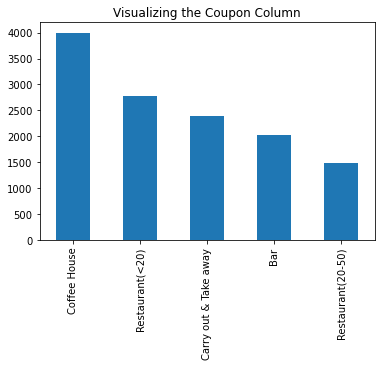

In [282]:
data['coupon'].value_counts().plot(kind='bar',title='Visualizing the Coupon Column');

6. Use a histogram to visualize the temperature column.

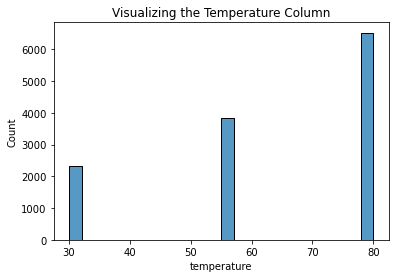

In [285]:
sns.histplot(data, x='temperature').set_title('Visualizing the Temperature Column');

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
data_bar=data.query('coupon=="Bar"')
#data_bar

2. What proportion of bar coupons were accepted?


In [18]:
#Rrmoving empty cells in the Bar column of the data frame
data_bar['Bar'].isnull().sum()
data_bar['Bar'].replace('',np.nan)
data_bar=data_bar.dropna(subset=['Bar'])

In [19]:
#Total number of people who accepted the bar coupon (Y=1)
data_bar['Y'].sum()

819

In [20]:
#Total number of bar coupons 
data_bar['Y'].value_counts().sum()

1996

In [21]:
accept_Bar_coupon_perc=round(data_bar['Y'].sum()/data_bar['Y'].value_counts().sum()*100,2)
accept_Bar_coupon_perc

41.03

1 = Accepted 
0 = Not Accepted


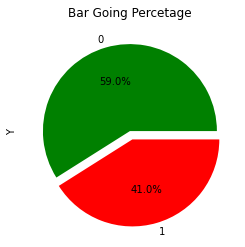

In [286]:
data_bar['Y'].value_counts().plot(kind = 'pie', explode = [0,0.1],autopct="%0.1f%%", colors = ['g','r'],title='Bar Going Percetage');
print('1 = Accepted \n0 = Not Accepted')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
# People who went to the bar 3 times or fewer and accepted the coupon
times_or_fewer3 = ['never','less1','1~3']
df_times_or_fewer3=data_bar.query('Bar in @times_or_fewer3')
df_times_or_fewer3['Y'].sum()

666

In [287]:
# People who went to the bar 3 times or fewer and accepted the coupon
times_or_more3 = ['4~8','gt8']
df_times_or_more3=data_bar.query('Bar in @times_or_more3')
df_times_or_more3['Y'].sum()

153

In [290]:
#Acceptance rate of the people who went to bars 3 times of fewer to those who went more 
Acc_rate_comp=round(df_times_or_fewer3['Y'].sum()/df_times_or_more3['Y'].sum(),2)
Acc_rate_comp

4.35

In [27]:
# People who went to the bar more than 3 times and accepted the coupon
times_or_greater3 = ['4~8','gt8']
df_times_or_greater3=data_bar.query('Bar in @times_or_greater3')
df_times_or_greater3['Y'].sum()

153

In [28]:
# Total number of coupons sent to people who went to the bar more than 3 times
df_times_or_greater3['Y'].value_counts().sum()

199

In [29]:
#Acceptance rate of the people who went to bar more than 3 times 
Acc_rate2=round(df_times_or_greater3['Y'].sum()/df_times_or_greater3['Y'].value_counts().sum()*100,2)
Acc_rate2

76.88

1 = Accepted 
0 = Not Accepted


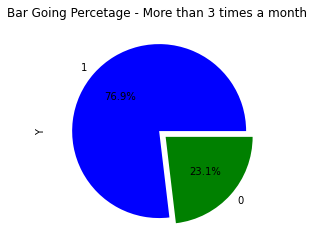

In [274]:
df_times_or_greater3['Y'].value_counts().plot(kind = 'pie', explode = [0,0.1],autopct="%0.1f%%", colors = ['b','g'],title='Bar Going Percetage - More than 3 times a month ');
print('1 = Accepted \n0 = Not Accepted')

#### Based on the investigation above, acceptance rate of the people who went to the bars more than 3 times a month is about 77%, and acceptance rate for people who went to the bar fewer than 3 times is 37%.  Acceptance rate is twice as much than the people who went 3 times or fewer than to the bars.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [31]:
#drivers who go to bar more than once amonth 
list_more_than_once_amonth = ['1~3','4~8','gt8']
df_more_1amonth=data_bar.query('Bar in @list_more_than_once_amonth')
df_more_1amonth['Y'].sum()

410

In [32]:
pd.set_option('display.max_rows', None) # show all the rows in the dataset
#drivers who went to the bar more than once a month over the age 25
df_more_1amonth_1=df_more_1amonth[df_more_1amonth['age']>26]
print(df_more_1amonth_1['Y'].sum())

161


In [33]:
#Total number of people who accepted the bar coupon (Y=1)
data_bar['Y'].sum()

819

In [34]:
#Acceptance rate of drivers who went to the bar more than once a month
Acc_rate3=round(df_more_1amonth_1['Y'].sum()/data_bar['Y'].sum()*100,2)
Acc_rate3

19.66

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [35]:
data_bar_1=data_bar.set_index('passanger') #setting the index to passenger 
data_bar_1=data_bar_1.drop(index=['Kid(s)']) #removoing Kids from the passenger list 
data_bar_1=data_bar_1.set_index('occupation') # setting the index to occupation
#data_bar_1[data_bar_1['occupation'].str.contains('Farm')] # checking for occupation that has farm
data_bar_1=data_bar_1.drop(index=['Farming Fishing & Forestry']) #removing Farming, Fishing and Forestry from...
#occupation list 
data_bar_1=data_bar_1.reset_index() #restting the index 
data_bar_1['Y'].value_counts().sum()
#data_bar_1.sample()
Acc_rate4 =  round(data_bar_1['Y'].sum()/data_bar_1['Y'].value_counts().sum()*100,2)
Acc_rate4

43.31

1 = Accepted 
0 = Not Accepted


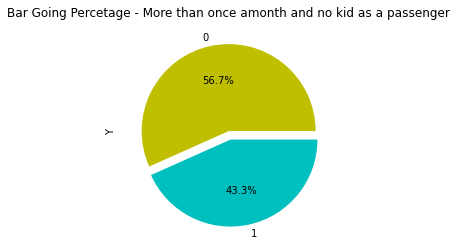

In [275]:
data_bar_1['Y'].value_counts().plot(kind = 'pie', explode = [0,0.1],autopct="%0.1f%%", colors = ['y','c'],title='Bar Going Percetage - More than once amonth and no kid as a passenger');
print('1 = Accepted \n0 = Not Accepted')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



#### Go to bars more than once a month and are under the age of 30 OR

In [37]:
data_bar_2=data_bar.set_index('Bar') #setting the index to Bar
data_bar_2=data_bar_2.drop(index=['never', 'less1']) #removoing people go to bar less than once a month from the dataset
data_bar_2=data_bar_2.reset_index() #resetting the index
data_bar_2=data_bar_2[data_bar_2['age']<31] #filtering age column only to keep people under age 31
Acc_rate4 = round(data_bar_2['Y'].sum()/data_bar_2['Y'].value_counts().sum()*100,2)
Acc_rate4

72.17

1 = Accepted 
0 = Not Accepted


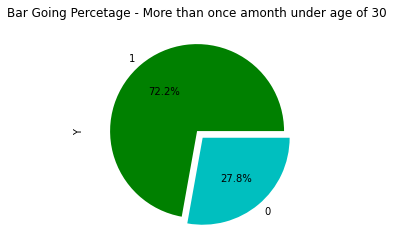

In [276]:
data_bar_2['Y'].value_counts().plot(kind = 'pie',autopct="%0.1f%%",
                                    explode = [0,0.1], colors = ['g','c'], title='Bar Going Percetage - More than once amonth under age of 30');
print('1 = Accepted \n0 = Not Accepted')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, average 60% of the bar coupons were accepted and majority of the people who accpeted the coupons are under the age of 30 and they go to the bars more than once a month.   

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### I will be investigating coffee house demographics in this section 

#### Intention of this analysis to determine which demography of people consume more coffees in order to maximize the outcome

In [133]:
data_coffee=data.query('coupon=="Coffee House"') # creating a database only with people who went to coffee house
data_coffee['CoffeeHouse'].isnull().sum() # investigating empty cells in the CoffeeHouse column 
data_coffee['CoffeeHouse'].replace('',np.nan) #replacing the empty cells to NaN
data_coffee=data_coffee.dropna(subset=['CoffeeHouse']) #Dropping NaN from the CoffeeHouse rows 
data_coffee.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1302,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,50,Unmarried partner,1,Associates degree,Retired,$50000 - $62499,never,4~8,4~8,1~3,less1,1,1,0,0,1,0
12360,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,31,Single,0,Bachelors degree,Education&Training&Library,$25000 - $37499,less1,4~8,less1,4~8,1~3,1,1,0,0,1,0
1066,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Female,31,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$75000 - $87499,less1,1~3,gt8,4~8,1~3,1,1,0,0,1,1
5280,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,50,Married partner,1,Graduate degree (Masters or Doctorate),Retired,$62500 - $74999,never,4~8,1~3,4~8,less1,1,1,0,0,1,1
1944,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,41,Married partner,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$50000 - $62499,less1,4~8,4~8,1~3,less1,1,1,0,0,1,0


In [134]:
#setting the index to Coffeehouse and removoing never dataset and resting the index
data_C_ndrop=data_coffee.set_index('CoffeeHouse').drop(index=['never']).reset_index() 

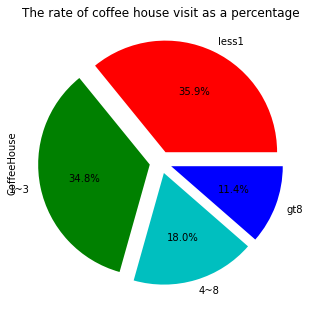

In [292]:
# The rate of coffee house visit as a percentage 
plt.figure(figsize=(5,6))
data_C_ndrop['CoffeeHouse'].value_counts().plot(kind = 'pie',autopct="%0.1f%%", colors = ['r','g','c','b'],
                                                explode = [0.1,0.1,0.1,0.1],title='The rate of coffee house visit as a percentage');

##### Based on the figure above majority of the people went to the coffee show 3 times or less 

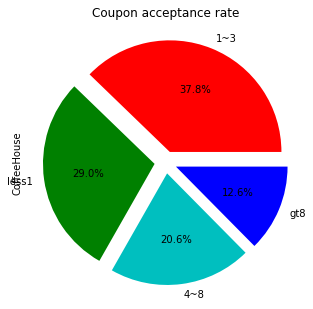

In [293]:
# Coupon acceptance rate 
plt.figure(figsize=(5,6))
data_C_ndrop.query('Y==1')['CoffeeHouse'].value_counts().plot(kind = 'pie',autopct="%0.1f%%", colors = ['r','g','c','b'],
                                                              explode = [0.1,0.1,0.1,0.1],title='Coupon acceptance rate');

##### Also pie chart above verifies that majority of the people who accepted the coupons went 3 times or less  

In [150]:
#Investigating the further people who accepted the coupons who went 3 times or less
list_less_than3 = ['1~3', 'less1']
df_C_less_than3=data_C_ndrop.query('CoffeeHouse in @list_less_than3')
df_C_less_than3['Y'].sum()
df_C_less_than3['Y'].value_counts().sum()
print("Coupon accepted by people who went less than 3 times month is", df_C_less_than3['Y'].sum())
print("Total number of coupons for people went to the coffee house less than 3 times month is",df_C_less_than3['Y'].value_counts().sum())
Acc_Rt_less_than3 = df_C_less_than3['Y'].sum()/df_C_less_than3['Y'].value_counts().sum()
print("Acceptance rate is", round(Acc_Rt_less_than3*100,2), 'percent')

Coupon accepted by people who went less than 3 times month is 1193
Total number of coupons for people went to the coffee house less than 3 times month is 2117
Acceptance rate is 56.35 percent


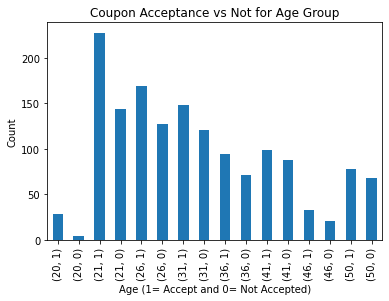

In [143]:
#Correlating the above details with age distribution 
df_C_less_than3.groupby('age')[['Y']].value_counts()

df_C_less_than3.groupby('age')[['Y']].value_counts().plot(kind='bar', xlabel='Age (1= Accept and 0= Not Accepted)',
                                                          ylabel='Count', title='Coupon Acceptance vs Not for Age Group');

#### It appears age group 21 to 31 accepted more coupons

In [294]:
#Selecting the ages 21 to 31 for further investigations
list_slcted_age = [21,26,31]
df_C_age=df_C_less_than3.query('age in @list_slcted_age' )
df_C_age.sample(5)

,CoffeeHouse,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1432,1~3,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,1d,Female,31,Married partner,1,Some college - no degree,Arts Design Entertainment Sports & Media,$12500 - $24999,never,4~8,4~8,never,1,0,0,0,1,1
32,less1,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,1~3,less1,1~3,1,0,0,0,1,1
733,less1,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,0,Some college - no degree,Unemployed,$12500 - $24999,1~3,1~3,1~3,less1,1,1,0,0,1,1
2965,1~3,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,21,Married partner,0,Some college - no degree,Healthcare Support,$12500 - $24999,less1,1~3,1~3,less1,1,1,0,0,1,0
704,less1,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Single,0,Some college - no degree,Management,$25000 - $37499,4~8,gt8,1~3,1~3,1,0,0,0,1,0


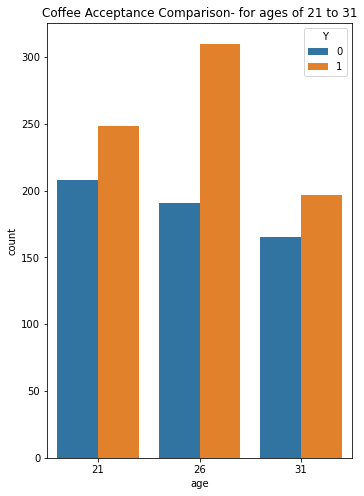

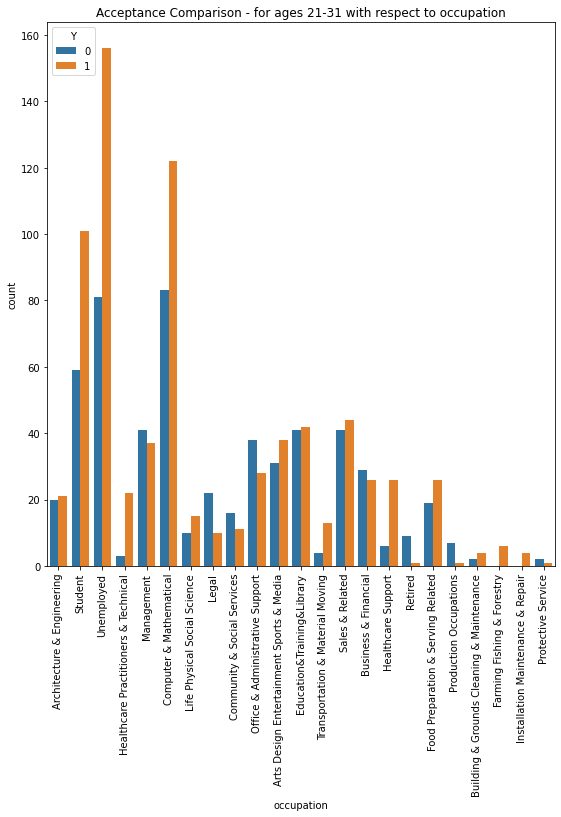

In [298]:
#Coffee Acceptance Comparison for ages of 21 to 31
plt.figure(figsize=(12,8)) # figure size
plt.subplot(121) # setting up the 1st sub plots
plt.title('Coffee Acceptance Comparison- for ages of 21 to 31') #Title
sns.countplot(data=df_C_age, x='age', hue='Y')
#Coffee Acceptance Comparison for same ages with respect to occupation
plt.figure(figsize=(20,10)) # figure size
plt.subplot(122) #setting up the 2nd subplot
plt.title("Acceptance Comparison - for ages 21-31 with respect to occupation") #Title
plt.xticks(rotation=90) # X axis title rotation
sns.countplot("occupation", hue="Y", data = df_C_age);

#### Based on the information above it can be concluded, in order to maximize the profits it is better select the age groups 21-31 and who are unemployed, student, and computer and mathematical field.  

In [300]:
#Understanding the what day of the time selected group visits coffee house 
list_slcted_occ = ['Unemployed','Student','Computer & Mathematical']
df_C_age_occ=df_C_age.query('occupation in @list_slcted_occ' )
#df_C_age_occ.sample(5)
px.histogram(df_C_age_occ, x='time',y='age', color='occupation' , template='simple_white',title='Selected Group Coffee Consumption Times')

#### It appears selected group visited the coffee shop less at 10pm

In [306]:
#Understanding affects of weather on coffee house visits
px.histogram(df_C_age_occ, x='weather',y='age', color='occupation' , template='simple_white',title='Coffee Consumption Based on Weather')

In [308]:
#Understanding affects of temperature on coffee house visits
px.histogram(df_C_age_occ, x='temperature',y='age', color='occupation' , template='simple_white',title='Coffee Consumption Based on Temperature')

# Conclusion 

#### it can be concluded to maximize the effects ages from 21 - 31 in who are students, unemployed, and who are working in the computer and mathematical field consumed more coffees and accepted higher percetage of coupons.  It is advice to deliver the coupons during spring to fall time when the temperatures are 50 dgrees or higher  